# Instructions

Travail individuel à réaliser par chaque étudiant. Chaque fichier devra ensuite être rassemblé par groupe dans le premier dépôt Git de l'année universitaire, dans un nouveau dossier nommé <code>Computer Vision</code>.

Le nom du fichier doit être le prénom de l'étudiant écrit en minuscules. Par exemple, si l'étudiant s'appelle BOB Toto, le fichier doit être nommé toto.ipynb.

# Détails de l'étudiant
### Nom(s)  : FIATOA   
### Prénom(s) : Tovomanandrafale
### Classe : ESIIA 4 , n°26

# Vision par Ordinateur avec Keras/TensorFlow : Un Notebook Pratique et Conceptuel

Ce notebook a pour objectif de vous guider pas à pas dans la création et l'analyse d'un modèle de réseau de neurones convolutif (CNN) appliqué au jeu de données CIFAR-10. Chaque étape est accompagnée d'explications pratiques ainsi que de questions conceptuelles pour renforcer votre compréhension des enjeux théoriques et pratiques de la vision par ordinateur.

## Étape 1 : Introduction et Configuration de l'Environnement

Dans cette étape, nous allons configurer notre environnement de travail et importer les bibliothèques indispensables pour le deep learning et la manipulation de données. Nous vérifions également la version de TensorFlow pour nous assurer que tout fonctionne correctement.

### Explication Pratique
La bonne configuration de l'environnement est cruciale pour garantir la reproductibilité et la stabilité de vos expériences. En particulier, les versions des bibliothèques peuvent influencer le comportement du modèle et sa performance, d'où l'importance de vérifier et documenter ces versions dès le début.

In [1]:
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print('Version de TensorFlow :', tf.__version__)

Version de TensorFlow : 2.18.0


### Question  1

**Q1 :** Pourquoi est-il essentiel de vérifier la configuration de l'environnement (versions des bibliothèques, dépendances, etc.) avant de développer un modèle de deep learning ?

_Répondez dans une nouvelle cellule Markdown._

l est crucial de vérifier la configuration de l'environnement pour plusieurs raisons :

* **Reproductibilité** : Assurer que les mêmes versions de bibliothèques sont utilisées garantit que les résultats peuvent être reproduits sur différentes machines.
* **Compatibilité** : Les différentes versions de bibliothèques peuvent avoir des incompatibilités, entraînant des erreurs ou des comportements inattendus.
* **Stabilité** : Certaines versions peuvent contenir des bugs ou des failles de sécurité, affectant la stabilité et la performance du modèle.
* **Performance** : Les performances peuvent varier en fonction des versions de bibliothèques, notamment en termes de vitesse d'exécution et d'utilisation de la mémoire.
* **Dépendances** : Il est important de s'assurer que toutes les dépendances nécessaires sont installées et compatibles entre elles.

## Étape 2 : Chargement et Prétraitement des Données

Nous allons charger le jeu de données CIFAR-10, composé de 60 000 images couleur réparties en 10 classes. Dans cette étape, nous normalisons les valeurs des pixels afin qu'elles soient comprises entre 0 et 1, et nous transformons les étiquettes en format one-hot pour faciliter le processus de classification.

### Explication Pratique
La normalisation aide à stabiliser et accélérer l'entraînement du modèle en assurant que les valeurs d'entrée ont une échelle comparable. Le one-hot encoding évite que le modèle interprète les étiquettes comme des valeurs numériques ordonnées, ce qui est essentiel pour les problèmes de classification multi-classes.

In [2]:
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normaliser les valeurs des pixels (entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir les vecteurs de classes en matrices binaires (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Forme des données d'entrainement :", x_train.shape)
print("Forme des étiquettes d'entraînement :", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Forme des données d'entrainement : (50000, 32, 32, 3)
Forme des étiquettes d'entraînement : (50000, 10)


### Question 2

**Q2 :** Expliquez comment la normalisation des pixels et le one-hot encoding des étiquettes contribuent chacun à la stabilité et à l'efficacité de l'entraînement d'un modèle de deep learning.

_Répondez dans une nouvelle cellule Markdown._

* **Normalisation des pixels :**
    * La normalisation des pixels, en les ramenant à une échelle commune (généralement entre 0 et 1), permet de :
        * Accélérer la convergence du modèle : Les valeurs normalisées facilitent l'optimisation des poids.
        * Améliorer la stabilité de l'entraînement : Les valeurs de pixels brutes peuvent varier considérablement, ce qui peut rendre l'entraînement instable.
        * Réduire l'impact des valeurs aberrantes : Les valeurs normalisées réduisent l'influence des pixels ayant des valeurs très élevées ou très faibles.
* **One-hot encoding des étiquettes :**
    * Le one-hot encoding transforme les étiquettes en vecteurs binaires, où chaque classe est représentée par un vecteur avec un seul élément égal à 1 et les autres à 0. Cela permet de :
        * Traiter les problèmes de classification multi-classes : Le modèle peut produire une distribution de probabilité sur toutes les classes.
        * Éviter l'interprétation erronée des étiquettes : Sans one-hot encoding, le modèle pourrait interpréter les étiquettes comme des valeurs numériques ordonnées, ce qui n'est pas souhaitable pour la classification.

## Étape 3 : Exploration et Visualisation des Données

Avant de construire le modèle, il est important d'explorer et de visualiser les données. Nous affichons ainsi un échantillon d'images du jeu de données pour mieux comprendre leur contenu et la distribution des classes.

### Explication Pratique
La visualisation des données permet d'identifier d'éventuelles anomalies, comme des classes sous-représentées ou des images bruitées, et de décider si des techniques d'augmentation de données ou de prétraitement supplémentaires sont nécessaires.

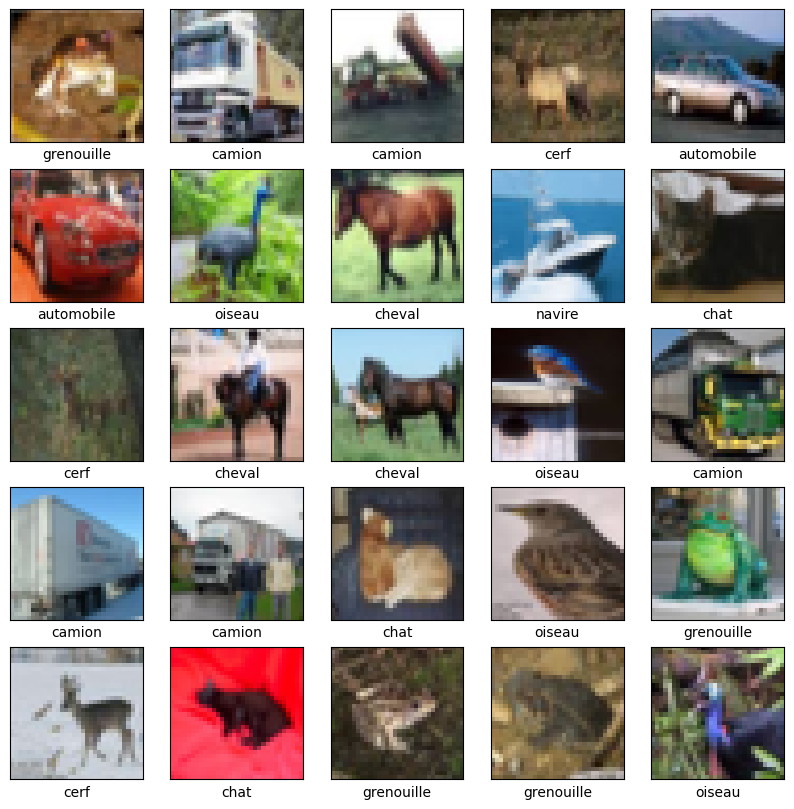

In [3]:
# Afficher quelques images du jeu de données d'entraînement
noms_classes = ['avion', 'automobile', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'navire', 'camion']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(noms_classes[y_train[i].argmax()])
plt.show()

### Question 3

**Q3 :** D'après la visualisation, discutez de l'impact potentiel d'une distribution inégale des classes ou de la présence d'images de mauvaise qualité sur la performance d'un modèle de classification. Quelles stratégies pourraient être mises en place pour pallier ces problèmes ?

_Répondez dans une nouvelle cellule Markdown._

* **Impact potentiel :**
    * **Distribution inégale des classes :** Si certaines classes sont sous-représentées, le modèle peut être biaisé en faveur des classes dominantes, ce qui réduit sa performance sur les classes minoritaires.
    * **Présence d'images de mauvaise qualité :** Les images bruitées ou floues peuvent perturber l'entraînement du modèle, réduisant sa capacité à extraire des caractéristiques pertinentes.
* **Stratégies :**
    * **Distribution inégale des classes :**
        * **Sur-échantillonnage :** Dupliquer les échantillons des classes sous-représentées.
        * **Sous-échantillonnage :** Réduire le nombre d'échantillons des classes sur-représentées.
        * **Pondération des classes :** Attribuer des poids plus élevés aux classes sous-représentées lors de l'entraînement.
    * **Présence d'images de mauvaise qualité :**
        * **Augmentation de données :** Générer des variations des images existantes pour augmenter la diversité du jeu de données.
        * **Prétraitement :** Appliquer des techniques de débruitage ou de filtrage pour améliorer la qualité des images.
        * **Nettoyage des données :** Supprimer les images trop bruitées ou mal étiquetées.

## Étape 4 : Construction du Modèle CNN

Nous allons construire un réseau de neurones convolutif (CNN) pour extraire des caractéristiques hiérarchiques des images. Ce modèle se compose de plusieurs blocs de convolution suivis de couches de pooling et se termine par des couches entièrement connectées pour la classification.

### Explication Pratique
Les couches de convolution permettent au modèle de détecter des motifs locaux (comme les contours ou les textures), tandis que les couches de pooling réduisent la dimensionnalité, ce qui diminue la charge computationnelle et aide à rendre le modèle plus robuste aux translations. Le dropout, quant à lui, est une technique de régularisation qui aide à prévenir le surapprentissage en désactivant aléatoirement certains neurones pendant l'entraînement.

In [5]:
# Construire le modèle CNN
model = models.Sequential()

# Bloc de convolution 1 : 32 filtres, taille 3x3, activation ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 2 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 3 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatir les sorties et ajouter des couches entièrement connectées
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Question 4

**Q4 :** Décrivez le rôle de chaque composant du CNN (couches de convolution, pooling et dropout) et expliquez comment ils interagissent pour permettre au modèle d'extraire des caractéristiques pertinentes des images.

_Répondez dans une nouvelle cellule Markdown._

* **Couches de convolution(Conv2D) :**
    * Elles appliquent des filtres pour détecter des motifs locaux (contours, textures, etc.) dans les images.
    * Chaque couche augmente la profondeur des caractéristiques extraites :

        conv2d_3 : 32 filtres → détecte des motifs de base.

        conv2d_4 : 64 filtres → extrait des motifs plus complexes.

        conv2d_5 : encore 64 filtres → affine encore plus la détection des caractéristiques.

* **Couches de pooling(MaxPooling2D) :**
    * Elles réduisent la dimensionnalité des cartes de caractéristiques, ce qui diminue la charge computationnelle et rend le modèle plus robuste aux petites variations dans les images.
    * Elles aident à ne garder que les informations les plus importantes.

      MaxPooling2D(2,2) prend le maximum dans une fenêtre 2×2, ce qui :

        - Réduit la dimension spatiale (largeur et hauteur divisées par 2).

        - Diminue le nombre de paramètres et donc le coût de calcul.

        - Rend le modèle plus robuste aux petites variations et translations.

* **Couches d'Aplatissement et Denses (Flatten et Dense):**

    * Flatten transforme la sortie des couches convolutionnelles (qui est en 3D) en un vecteur 1D pour pouvoir être traité par des couches denses.

    * Dense(64, activation='relu') est une couche entièrement connectée qui apprend des combinaisons complexes de caractéristiques.

    * Dense(num_classes, activation='softmax') donne une probabilité pour chaque classe afin de classer l'image.
* **Dropout :**
    * C'est une technique de régularisation qui désactive aléatoirement certains neurones pendant l'entraînement.
    * Dropout(0.5) désactive aléatoirement 50 % des neurones pendant l'entraînement.

    * Il prévient le surapprentissage en réduisant la coadaptation des neurones.
* **Interaction :**
    * Les couches de convolution extraient des caractéristiques, les couches de pooling réduisent la dimensionnalité, et le dropout prévient le surapprentissage.
    * Cette combinaison permet au modèle d'apprendre des représentations robustes et pertinentes des images.

## Étape 5 : Compilation et Entraînement du Modèle

Nous allons maintenant compiler le modèle en choisissant un optimiseur, une fonction de perte ainsi que des métriques d'évaluation. Ensuite, nous entraînons le modèle sur les données d'entraînement en réservant une partie des données pour la validation.

### Explication Pratique
La compilation configure le processus d'apprentissage, notamment la manière dont les poids seront ajustés via la rétropropagation. Le choix de l'optimiseur (ici, Adam) et la définition des hyperparamètres (comme le taux d'apprentissage et la taille du batch) influencent grandement la vitesse de convergence et la qualité finale du modèle.

In [6]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 88ms/step - accuracy: 0.2528 - loss: 1.9866 - val_accuracy: 0.4733 - val_loss: 1.4849
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.4508 - loss: 1.4984 - val_accuracy: 0.5476 - val_loss: 1.2673
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.5202 - loss: 1.3422 - val_accuracy: 0.5803 - val_loss: 1.1824
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.5581 - loss: 1.2517 - val_accuracy: 0.5967 - val_loss: 1.1199
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.5884 - loss: 1.1671 - val_accuracy: 0.6308 - val_loss: 1.0687
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6081 - loss: 1.1107 - val_accuracy: 0.6412 - val_loss: 1.0232
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6225 - loss: 1.0693 - val_accuracy: 0.6721 - val_loss: 0.9468
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.6523 - loss: 0.9988 - 

### Question 5

**Q5 :** Quels sont les effets d'un choix inadapté d'hyperparamètres (comme le taux d'apprentissage ou la taille du batch) sur l'entraînement d'un réseau de neurones ? Expliquez en quoi un optimiseur bien configuré est crucial pour la convergence du modèle.

_Répondez dans une nouvelle cellule Markdown._

* **Effets d'un choix inadapté d'hyperparamètres :**
    * **Taux d'apprentissage trop élevé :** Le modèle peut osciller autour du minimum de la fonction de perte sans converger, ou même diverger.
    * **Taux d'apprentissage trop faible :** La convergence peut être très lente, voire stagner.
    * **Taille du batch trop grande :** La convergence peut être rapide, mais le modèle peut généraliser moins bien.
    * **Taille du batch trop petite :** L'entraînement peut être bruyant et instable.
* **Importance d'un optimiseur bien configuré :**
    * L'optimiseur détermine comment les poids du modèle sont ajustés pendant l'entraînement.
    * Un optimiseur bien configuré (comme Adam) permet d'accélérer la convergence, d'éviter les minima locaux et d'améliorer la stabilité de l'entraînement.
    * Il permet d'adapter le taux d'apprentissage au cours de l'entrainement.

## Étape 6 : Évaluation du Modèle

Après l'entraînement, nous évaluons notre modèle sur le jeu de test afin de mesurer sa capacité de généralisation sur des données inédites. Les métriques telles que la perte et la précision nous aident à quantifier la performance globale du modèle.

### Explication Pratique
L'évaluation sur un jeu de test indépendant permet de détecter un éventuel surapprentissage (overfitting). Si le modèle présente une bonne performance sur l'entraînement mais une performance médiocre sur le test, cela indique qu'il n'a pas suffisamment généralisé, ce qui peut nécessiter des ajustements comme plus de régularisation ou des techniques d'augmentation de données.

In [7]:
# Évaluer le modèle sur le jeu de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Précision sur le jeu de test :', test_acc)

313/313 - 4s - 13ms/step - accuracy: 0.6842 - loss: 0.9111
Précision sur le jeu de test : 0.6841999888420105


### Question  6

**Q6 :** Que nous indiquent la perte et la précision obtenues lors de l'évaluation sur le jeu de test ? Quels ajustements pourriez-vous envisager si vous observez un écart significatif entre les performances sur l'entraînement et le test ?

_Répondez dans une nouvelle cellule Markdown._

* **Perte et précision sur le jeu de test :**
    * La perte mesure l'erreur du modèle sur le jeu de test.
    * La précision mesure la proportion de prédictions correctes.
    * Ces métriques indiquent la capacité du modèle à généraliser sur des données inédites.

      Dans le cas de ce teste, une précision de 68,42 % montre que le modèle fonctionne, mais qu'il peut être amélioré.
* **Ajustements en cas d'écart significatif :**
    * **Surapprentissage :**
        * Ajouter du dropout ou d'autres techniques de régularisation.
        * Utiliser l'augmentation de données pour augmenter la diversité du jeu d'entraînement.
        * Réduire la complexité du modèle.
    * **Sous-apprentissage :**
        * Augmenter la complexité du modèle.
        * Entraîner le modèle plus longtemps.
        * Ajuster les hyperparamètres.

## Étape 7 : Prédictions et Visualisation des Résultats

Nous allons utiliser le modèle entraîné pour prédire les classes des images du jeu de test. La visualisation des résultats nous permet de comparer les étiquettes prédites aux étiquettes réelles et d'identifier les erreurs potentielles.

### Explication Pratique
La visualisation aide à comprendre qualitativement comment le modèle se comporte face à différentes images. Cela permet d'identifier si certaines classes sont systématiquement mal prédites ou si le modèle confond certaines catégories, ouvrant ainsi la voie à des améliorations ultérieures (par exemple, via l'augmentation de données ou des ajustements de l'architecture).

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


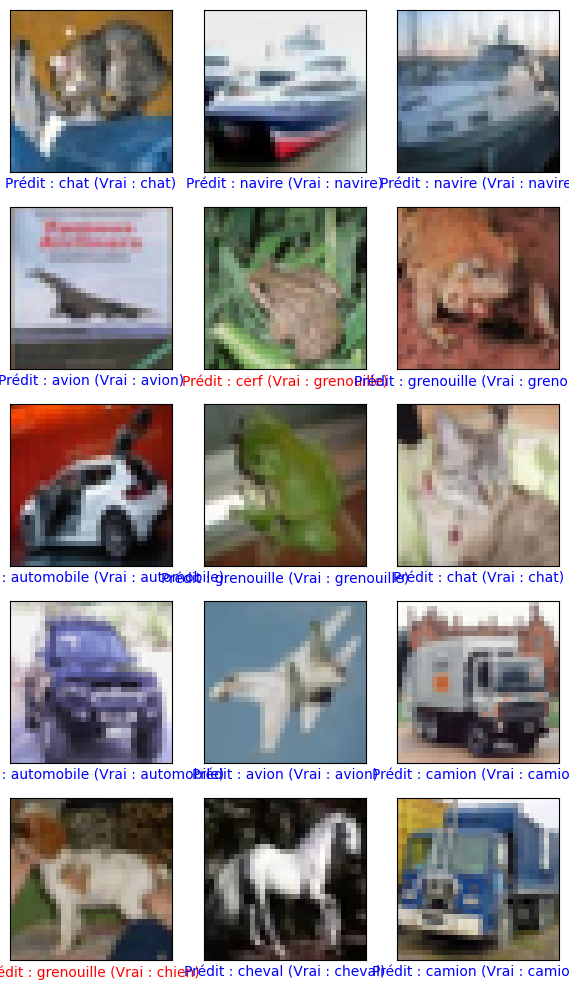

In [8]:
# Faire des prédictions sur le jeu de test
predictions = model.predict(x_test)

# Fonction pour afficher l'image avec les étiquettes prédites et réelles
def afficher_image(i, predictions_array, etiquette_vraie, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    etiquette_predite = np.argmax(predictions_array)
    etiquette_vraie = np.argmax(etiquette_vraie)

    couleur = 'blue' if etiquette_predite == etiquette_vraie else 'red'
    plt.xlabel(f"Prédit : {noms_classes[etiquette_predite]} (Vrai : {noms_classes[etiquette_vraie]})", color=couleur)

# Afficher quelques images de test avec leurs prédictions
nb_lignes = 5
nb_colonnes = 3
nb_images = nb_lignes * nb_colonnes
plt.figure(figsize=(2 * nb_colonnes, 2 * nb_lignes))
for i in range(nb_images):
    plt.subplot(nb_lignes, nb_colonnes, i+1)
    afficher_image(i, predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()

### Question 7

**Q7 :** Après avoir examiné les prédictions, identifiez et discutez des stratégies conceptuelles (par exemple, l'augmentation de données, le raffinement de l'architecture ou l'ajustement des hyperparamètres) qui pourraient améliorer la robustesse et la précision du modèle.

_Répondez dans une nouvelle cellule Markdown._

**Augmentation de données :** Ajout de transformations (rotation, symétrie, bruit) pour rendre le modèle plus robuste aux variations.

**Raffinement de l’architecture :** Expérimenter avec des modèles plus profonds ou d’autres architectures comme ResNet.

**Optimisation des hyperparamètres :** Ajustement du taux d’apprentissage, taille du batch et nombre d’époques.

**Utilisation du fine-tuning :** Exploiter des modèles pré-entraînés sur des bases similaires pour améliorer les performances.

## Étape 8 : Conclusion et Travaux Futurs

Dans ce notebook, nous avons :
- Configuré l'environnement et importé les bibliothèques nécessaires
- Chargé et prétraité le jeu de données CIFAR-10
- Exploré et visualisé les données
- Construit, compilé et entraîné un modèle CNN
- Évalué le modèle et visualisé ses prédictions

### Explication Pratique
Ce pipeline offre une approche complète, à la fois pratique et conceptuelle, pour la mise en œuvre d'un modèle de vision par ordinateur. Pour aller plus loin, vous pouvez explorer des architectures plus complexes, appliquer des techniques d'augmentation de données ou encore expérimenter avec différents optimisateurs afin de mieux comprendre l'impact de chacun sur la performance du modèle.